# **종합실습1 이변량분석(y-숫자) : car seat 매출 분석**

* 카시트에 대해서 지역 매장 별 매출액을 예측하고자 합니다.

![](https://cdn.images.express.co.uk/img/dynamic/24/590x/child-car-seat-986556.jpg?r=1532946857754)

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

### **(2) 데이터 로딩**

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부	|	feature	|
|	Income 	|	 지역 주민 평균 소득	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부	|	feature	|



In [6]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats2.csv'
data = pd.read_csv(path)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Urban,US
0,9.50,138,73,11,276,120,Bad,42,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,Yes,No


In [7]:
target = 'Sales'

## **2.숫자형 X --> Y**

* 모든 숫자형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : scatter, jointplot  
② 수치화 : 상관분석

In [35]:
def eda_2_nn(data, x, y):
    result = spst.pearsonr(data[x], data[y])
    print(f'r : {result[0]}')
    print(f'pv : {result[1]}')
    sns.scatterplot(x = x, y = y, data = data)
    plt.grid()
    plt.show()

### **(1) Advertising -> Sales**

1) 시각화 : scatter(regplot), jointplot

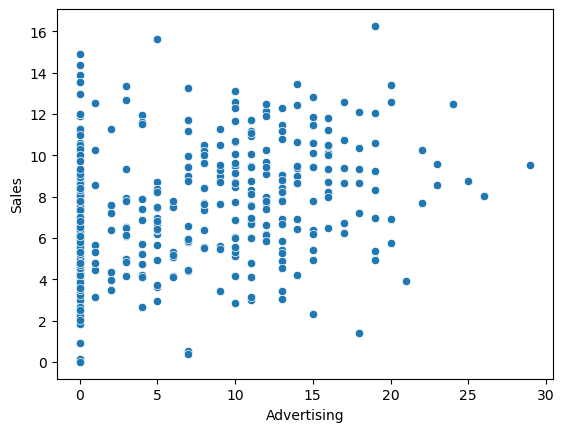

In [15]:
var = 'Advertising'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

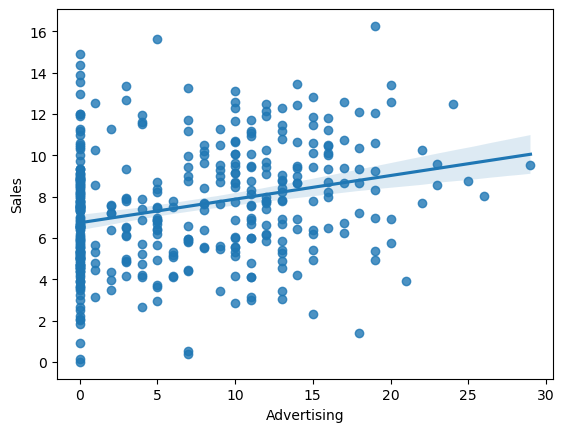

In [16]:
sns.regplot(x=var, y = target, data = data)
plt.show()

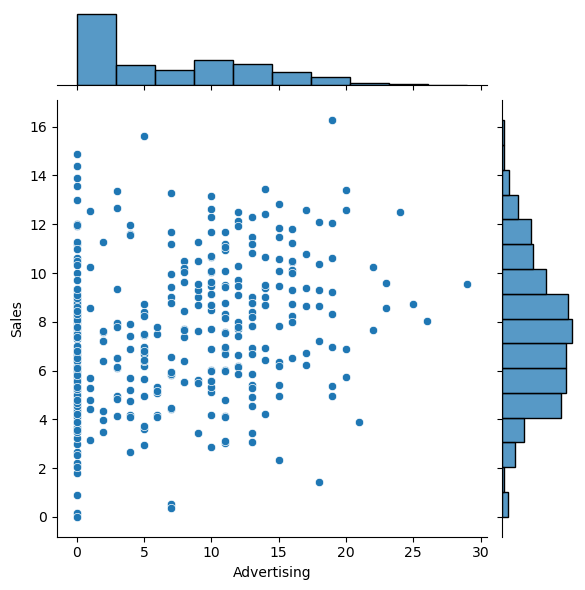

In [37]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [39]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.269506781376902, p-value : 4.3776771103027514e-08


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

* 광고비와 판매량은 관련이 있다. 그러나 크지 않다.

* 추가 : 광고비 0 빼고 분석해보기

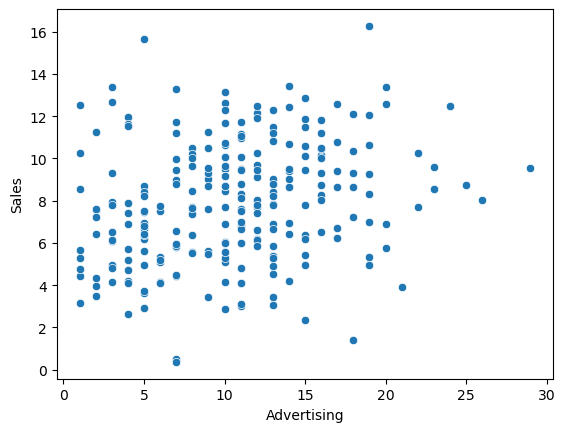

In [27]:
temp = data.loc[data['Advertising'] > 0]
sns.scatterplot(x=var, y = target, data = temp)
plt.show()

In [28]:
result = spst.pearsonr(temp[var], temp[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.2571829256169392, p-value : 3.112672883086058e-05


### **(2) Population -> Sales**

1) 시각화 : scatter(regplot), jointplot

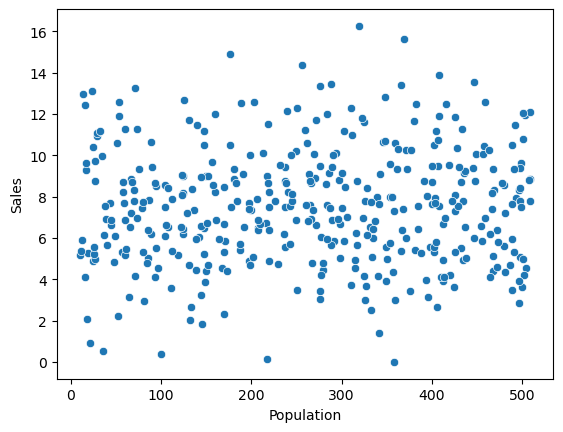

In [10]:
var = 'Population'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

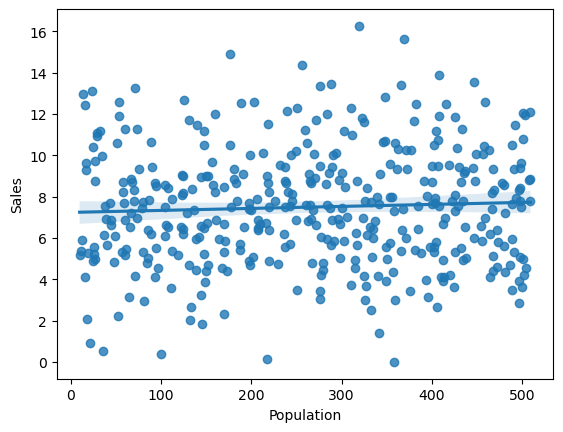

In [11]:
sns.regplot(x=var, y = target, data = data)
plt.show()

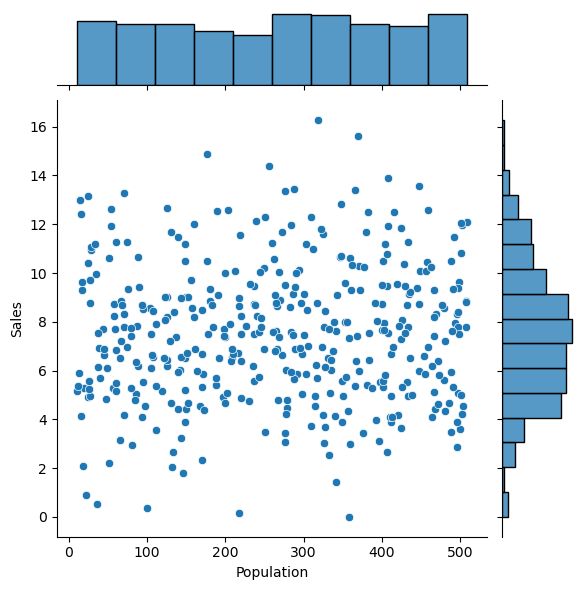

In [14]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [13]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.0504709844720392, p-value : 0.31398160931904856


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [16]:
# 지역 인구수와 판매수는 상관관계가 없다.
# 산점도를 보면 데이터가 무작위로 흩어진 걸 볼 수 있다. 

### **(3) Price -> Sales**

1) 시각화 : scatter(regplot), jointplot

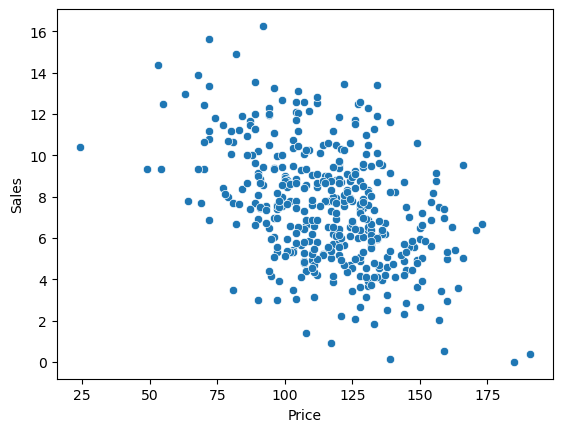

In [18]:
var = 'Price'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

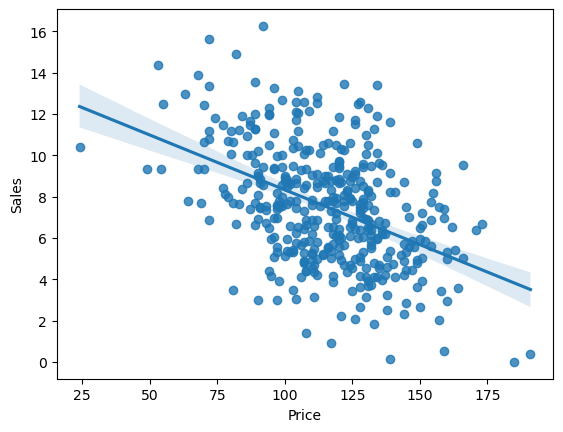

In [19]:
sns.regplot(x=var, y = target, data = data)
plt.show()

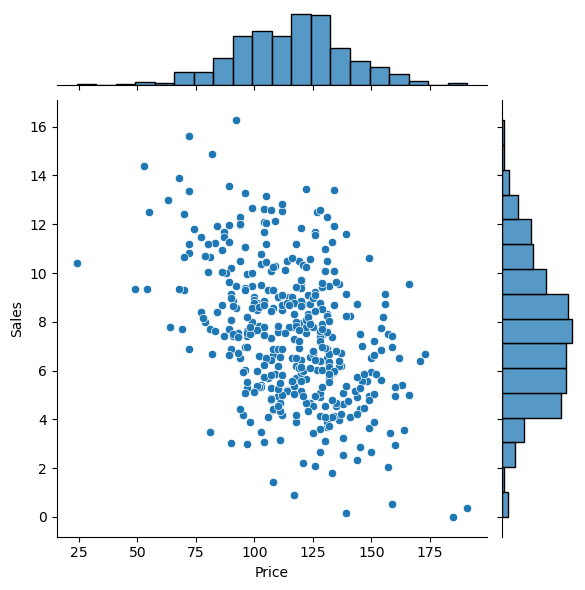

In [20]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [21]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.4449507278465726, p-value : 7.618187011913169e-21


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 중간 상관관계를 갖는 것처럼 보인다.
# price가 75 ~ 150일 때 선형적인 상관관계를 보인다. 

### **(4) Age -> Sales**

1) 시각화 : scatter(regplot), jointplot

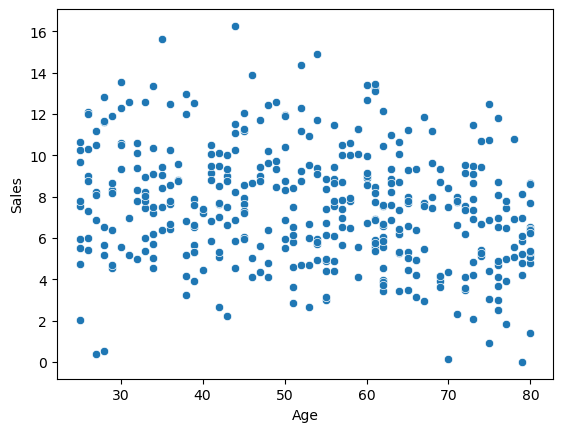

In [33]:
var = 'Age'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

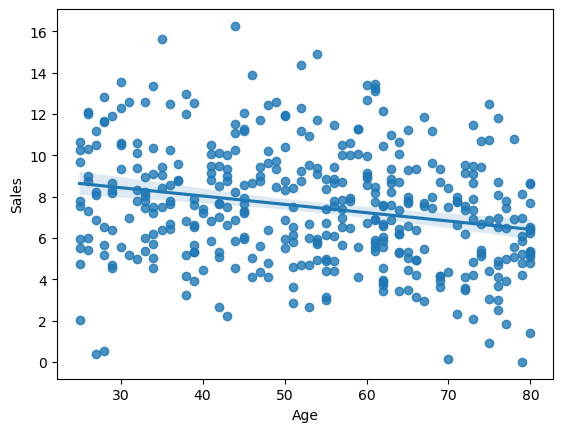

In [34]:
sns.regplot(x=var, y = target, data = data)
plt.show()

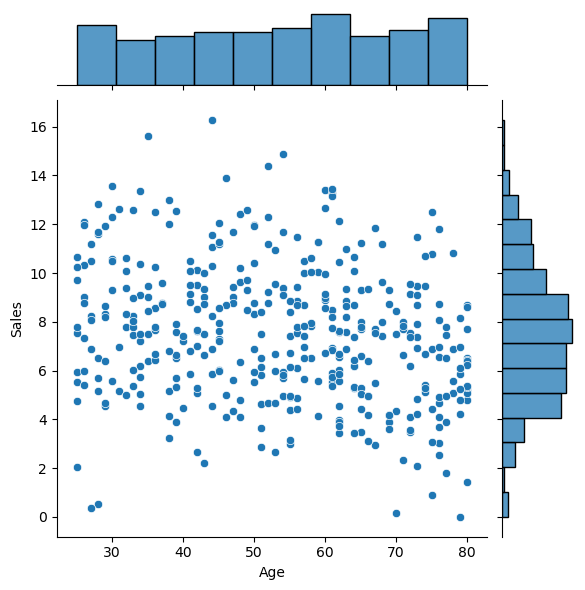

In [35]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [36]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : -0.2318154396045765, p-value : 2.7889498393714038e-06


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [37]:
# 약한 상관관계를 갖는다. 
# 나이가 들수록 판매량이 줄어보이는 경향이 있다.

### **(5) CompPrice -> Sales**

1) 시각화 : scatter(regplot), jointplot

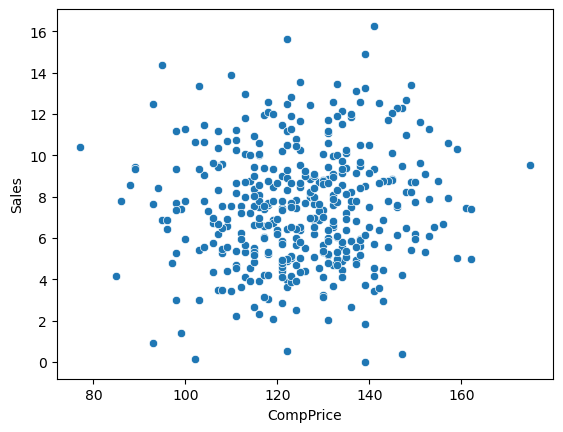

In [38]:
var = 'CompPrice'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

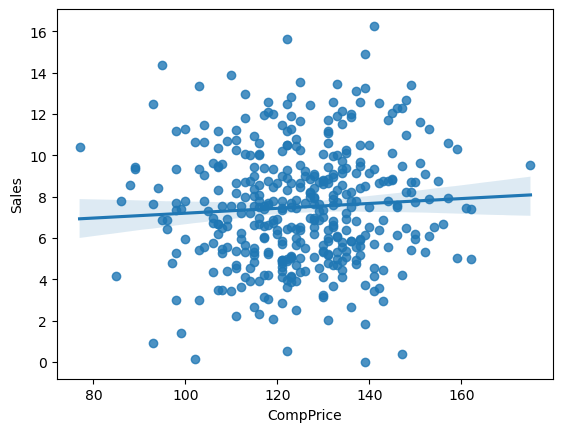

In [39]:
sns.regplot(x=var, y = target, data = data)
plt.show()

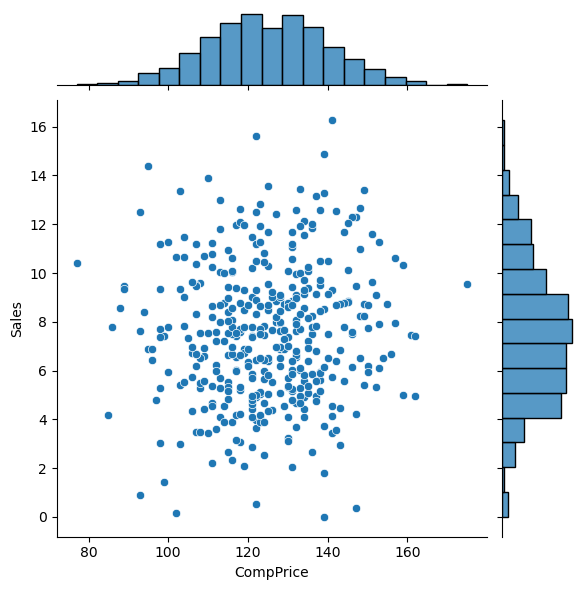

In [40]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [41]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.06407872955062152, p-value : 0.2009398289418404


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [42]:
# 약한 상관관계를 가지는 것을 볼 수 있다.  

r : 0.5979217124533921
pv : 3.877120641788767e-40


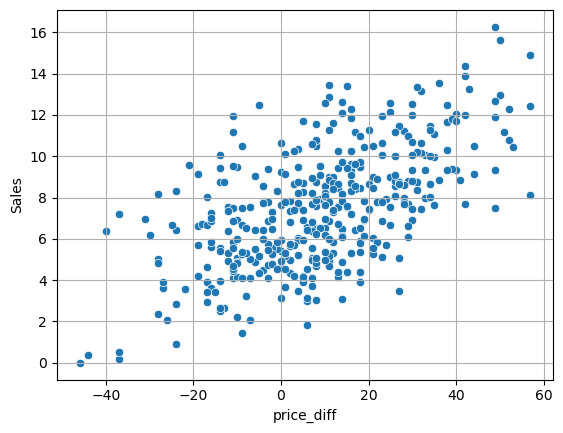

In [44]:
# 추가 분석 
# 가격차이 = 가격경쟁력
data['price_diff'] = data['CompPrice'] - data['Price']
# data.head()
# 분석
var = 'price_diff'
eda_2_nn(data, var, target)

### **(6) Income -> Sales**

1) 시각화 : scatter(regplot), jointplot

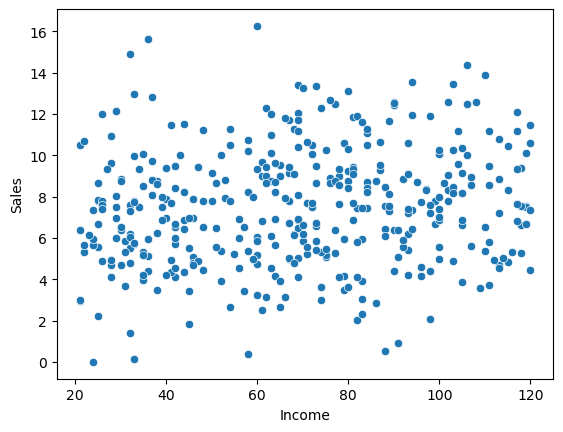

In [43]:
var = 'Income'

sns.scatterplot(x=var, y = target, data = data)
plt.show()

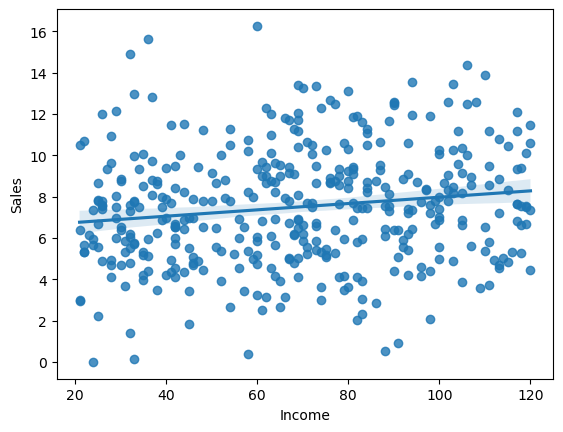

In [44]:
sns.regplot(x=var, y = target, data = data)
plt.show()

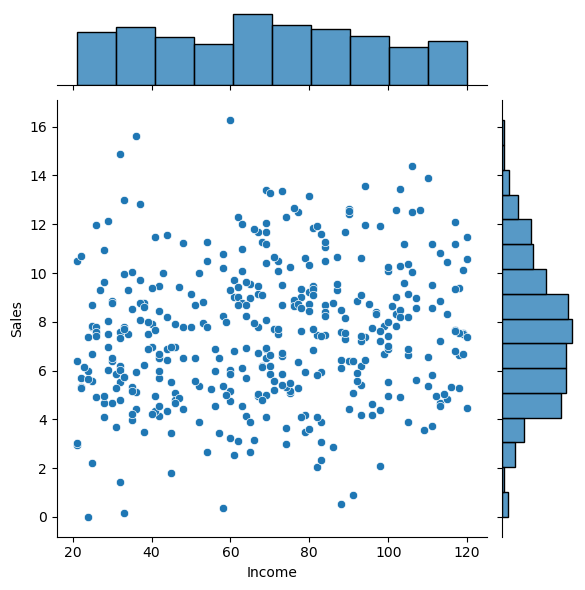

In [45]:
sns.jointplot(x=var, y = target, data = data)
plt.show()

2) 수치화 : 상관분석

In [46]:
result = spst.pearsonr(data[var], data[target])
print(f'상관계수 : {result[0]}, p-value : {result[1]}')

상관계수 : 0.15195097946754424, p-value : 0.0023096704539517904


3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [47]:
# 상관관계가 거의 없다고 볼 수 있다. 

## **3.범주형 X --> Y**

* 모든 범주형 X에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.

① 시각화 : 평균비교 barplot  
② 수치화 : t-test, anova

### **(1) ShelveLoc-> Sales**

1) 시각화 : 평균비교 barplot

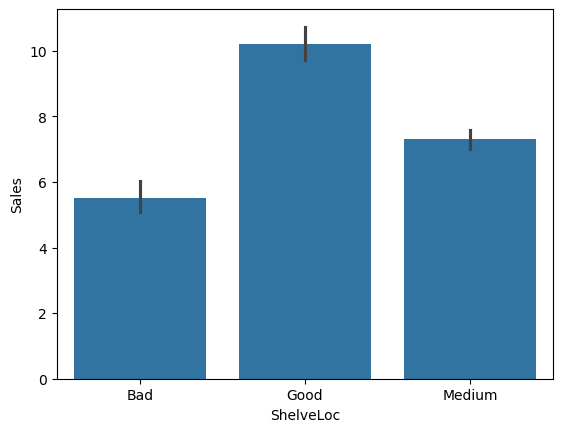

In [47]:
var = 'ShelveLoc'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [50]:
d_b = data.loc[data[var]=='Bad', target]
d_m = data.loc[data[var]=='Medium', target]
d_g = data.loc[data[var]=='Good', target]

spst.f_oneway(d_b, d_m, d_g)

F_onewayResult(statistic=92.22990509910348, pvalue=1.26693609015938e-33)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

In [ ]:
# 시각화 결과 평균의 차이가 크고 신뢰구간이 겹치는 것이 없어보인다.

### **(2) Urban -> Sales**

1) 시각화 : 평균비교 barplot

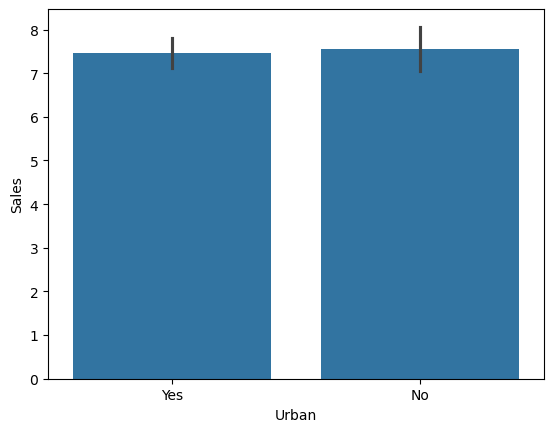

In [67]:
var = 'Urban'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [80]:
d_b = data.loc[data[var]=='Yes', target]
d_m = data.loc[data[var]=='No', target]

spst.ttest_ind(d_b, d_m)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

### **(3) US-> Sales**

1) 시각화 : 평균비교 barplot

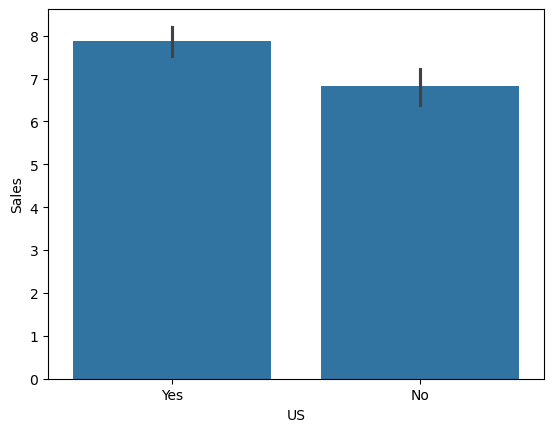

In [84]:
var = 'US'

sns.barplot(x=var, y=target, data = data)
plt.show()

2) 수치화 : t-test, anova

In [86]:
d_b = data.loc[data[var]=='Yes', target]
d_m = data.loc[data[var]=='No', target]

spst.ttest_ind(d_b, d_m)

TtestResult(statistic=3.589738747802499, pvalue=0.00037233958701471517, df=398.0)

3) 시각화와 수치화 결과로부터 파악한 내용을 적어 봅시다.

## **4.관계 정리하기**

① 강한관계

In [ ]:
# Price_Diff, ShelvecLoc

② 중간관계

In [ ]:
# Advertising<, Price, age, Income, Us

③ 관계없음

In [90]:
# Population, Urban